# Hotel booking

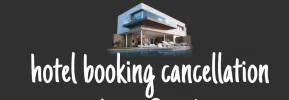

# Import Necessary Lirary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

# Load data:

In [4]:
hotel_data = pd.read_csv('21125892001-Abhishek_Prasad_Nonia_PDM513_CP.csv')

# Get the first 5 rows #check the top 5 row of dataset

In [5]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


# Find the Shape or Size of Dataset

In [6]:
hotel_data.shape

(119390, 32)

In [7]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# checking the summary statistics of data

In [8]:
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# checking the bottom 5 row of dataset

In [9]:
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


# Checking The Data Information

In [10]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# calculating the missing value in each column

In [11]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Cleaning

In [12]:
NaN_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}

In [13]:
hotel_data_clean = hotel_data.fillna(NaN_replacements)

In [14]:
hotel_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [15]:
hotel_data_clean['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

# All the undefined meals are considered as SC meals

In [16]:
hotel_data_clean["meal"].replace("Undefined", "SC", inplace=True)

# Data points with 0 occupants(0 adults + 0 children + 0 babies) are removed

In [17]:
hotel_data_clean['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

In [18]:
hotel_data_clean['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [19]:
hotel_data_clean['babies'].value_counts()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [20]:
zero_guests = list(hotel_data_clean[hotel_data_clean["adults"]
                   + hotel_data_clean["children"]
                   + hotel_data_clean["babies"]==0].index)

In [21]:
hotel_data_clean.drop(hotel_data_clean.index[zero_guests], inplace=True)

# Clean Save Data

In [22]:
hotel_data_clean.to_csv(r'Hotel3.csv', index = False)

In [23]:
hotel_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015


# EDA

# #Separating the data on the basis of hotels

In [24]:
# resort = full_data_clean[full_data_clean['hotel'] == 'Resort Hotel']
# city = full_data_clean[full_data_clean['hotel'] == 'City Hotel']

In [25]:
# city.head()

# To Check Duplicate Value

In [26]:
hotel_data_clean.duplicated().sum()

31980

# Drop Duplicate Value

In [27]:
hotel_data_clean.drop_duplicates(inplace=True)

In [28]:
filter = (hotel_data_clean.children == 0) & (hotel_data_clean.adults == 0) & (hotel_data_clean.babies == 0)

In [29]:
hotel_data_clean[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [30]:
guest_city = hotel_data_clean[hotel_data_clean['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,NCL,1
162,ATF,1
163,NAM,1
164,SDN,1


In [31]:
!pip install folium

# Missing Value

In [32]:
pd.set_option('display.max_rows', 500) 
missing_values_container =hotel_data_clean.isna().sum()

In [33]:
counter = 0
for i in range(len(missing_values_container)):
    if missing_values_container[i] != 0:
        counter +=1
        print(f'Number of missing values in column {hotel_data_clean.columns[i]} : {missing_values_container[i]}' '\n')
print(f'Total number of colums with nan of null values {counter}.')

Total number of colums with nan of null values 0.


In [34]:
def miss_val(df):
    misval = df.isnull().sum()
    miss_per = 100 * misval/len(df)
    df1 = pd.concat([misval,miss_per],axis=1)
    renamed = df1.rename(columns={0:'missing_val',1:'missing %'})
    new = renamed[renamed.iloc[:,1] !=0].sort_values('missing_val',ascending=False)
    return new

In [35]:
miss_val(hotel_data_clean)

,missing_val,missing %


In [36]:
import missingno as ms

<AxesSubplot:>

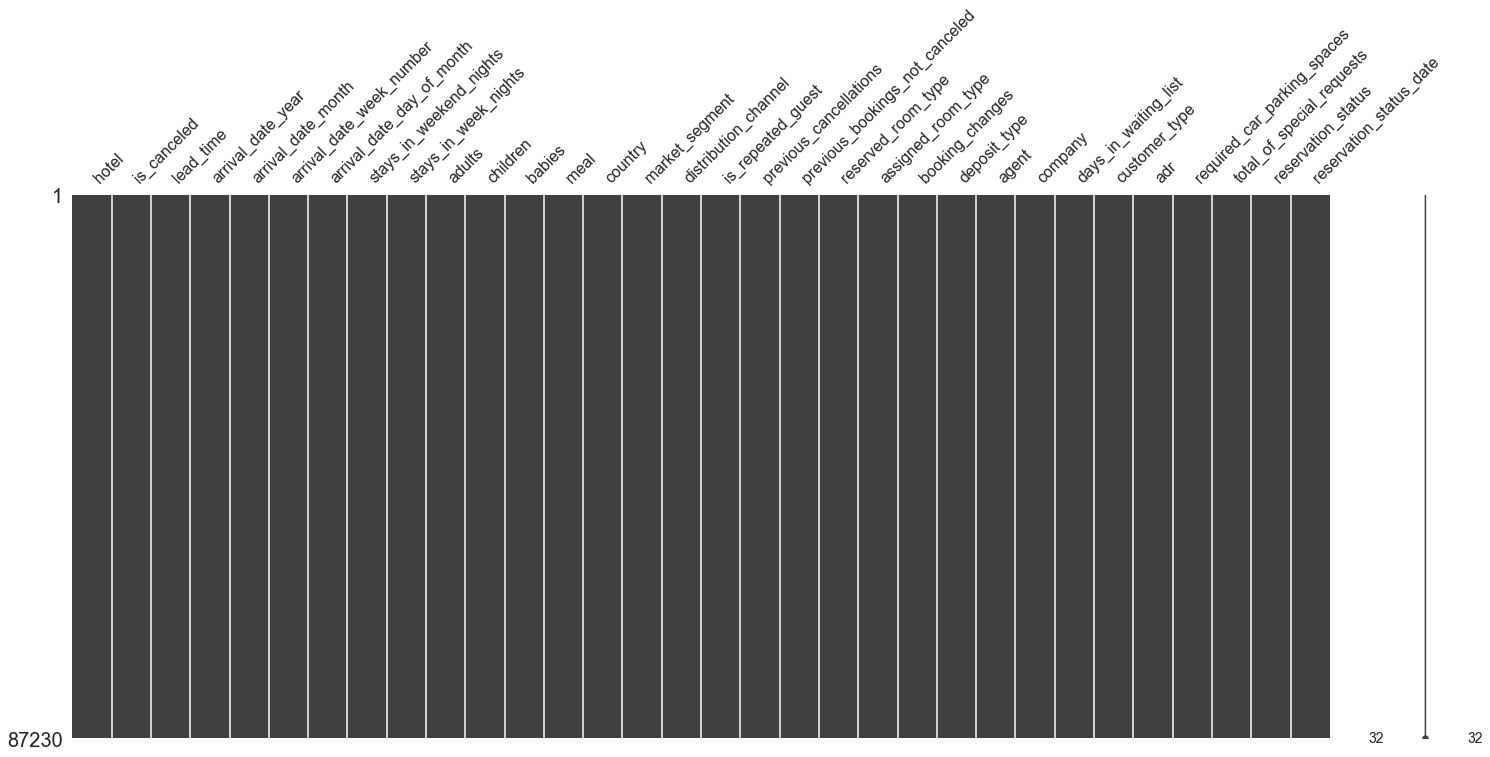

In [37]:
ms.matrix(hotel_data_clean)

# Checking categorical variables.

In [38]:
k,v=[],[]
for i in hotel_data_clean.select_dtypes('object').columns:
    k.append(i)
    v.append(list(hotel_data_clean[i].unique()))
categorydf=pd.DataFrame({'Category':k,'Sub-categoty':v})
print(categorydf)

                   Category                                       Sub-categoty
0                     hotel                         [Resort Hotel, City Hotel]
1        arrival_date_month  [July, August, September, October, November, D...
2                      meal                                   [BB, FB, HB, SC]
3                   country  [PRT, GBR, USA, ESP, IRL, FRA, Unknown, ROU, N...
4            market_segment  [Direct, Corporate, Online TA, Offline TA/TO, ...
5      distribution_channel         [Direct, Corporate, TA/TO, Undefined, GDS]
6        reserved_room_type                        [C, A, D, E, G, F, H, L, B]
7        assigned_room_type                  [C, A, D, E, G, F, I, B, H, L, K]
8              deposit_type               [No Deposit, Refundable, Non Refund]
9             customer_type      [Transient, Contract, Transient-Party, Group]
10       reservation_status                     [Check-Out, Canceled, No-Show]
11  reservation_status_date  [01-07-2015, 02-07-2015

In [39]:
hotel_data_clean.select_dtypes('object').describe().T

,count,unique,top,freq
hotel,87230,2,City Hotel,53274
arrival_date_month,87230,12,August,11242
meal,87230,4,BB,67907
country,87230,178,PRT,27355
market_segment,87230,8,Online TA,51553
distribution_channel,87230,5,TA/TO,69028
reserved_room_type,87230,9,A,56436
assigned_room_type,87230,11,A,46283
deposit_type,87230,3,No Deposit,86085
customer_type,87230,4,Transient,71862


# Analysing the value counts of each category with respect to target variable.

In [40]:
for i in k:
    print(i.upper())
    print(pd.crosstab(hotel_data_clean[i],hotel_data_clean.is_canceled))
    print(('X').center(120,'-'))

HOTEL
is_canceled       0      1
hotel                     
City Hotel    37239  16035
Resort Hotel  25982   7974
-----------------------------------------------------------X------------------------------------------------------------
ARRIVAL_DATE_MONTH
is_canceled            0     1
arrival_date_month            
April               5494  2406
August              7620  3622
December            3735  1377
February            4671  1412
January             3648  1037
July                6847  3196
June                5403  2353
March               5660  1829
May                 5902  2442
November            3921  1052
October             5279  1642
September           5041  1641
-----------------------------------------------------------X------------------------------------------------------------
MEAL
is_canceled      0      1
meal                     
BB           49864  18043
FB             261     99
HB            6631   2449
SC            6465   3418
------------------------------

# Plotting countplot of categorical variable to visualize distribution.

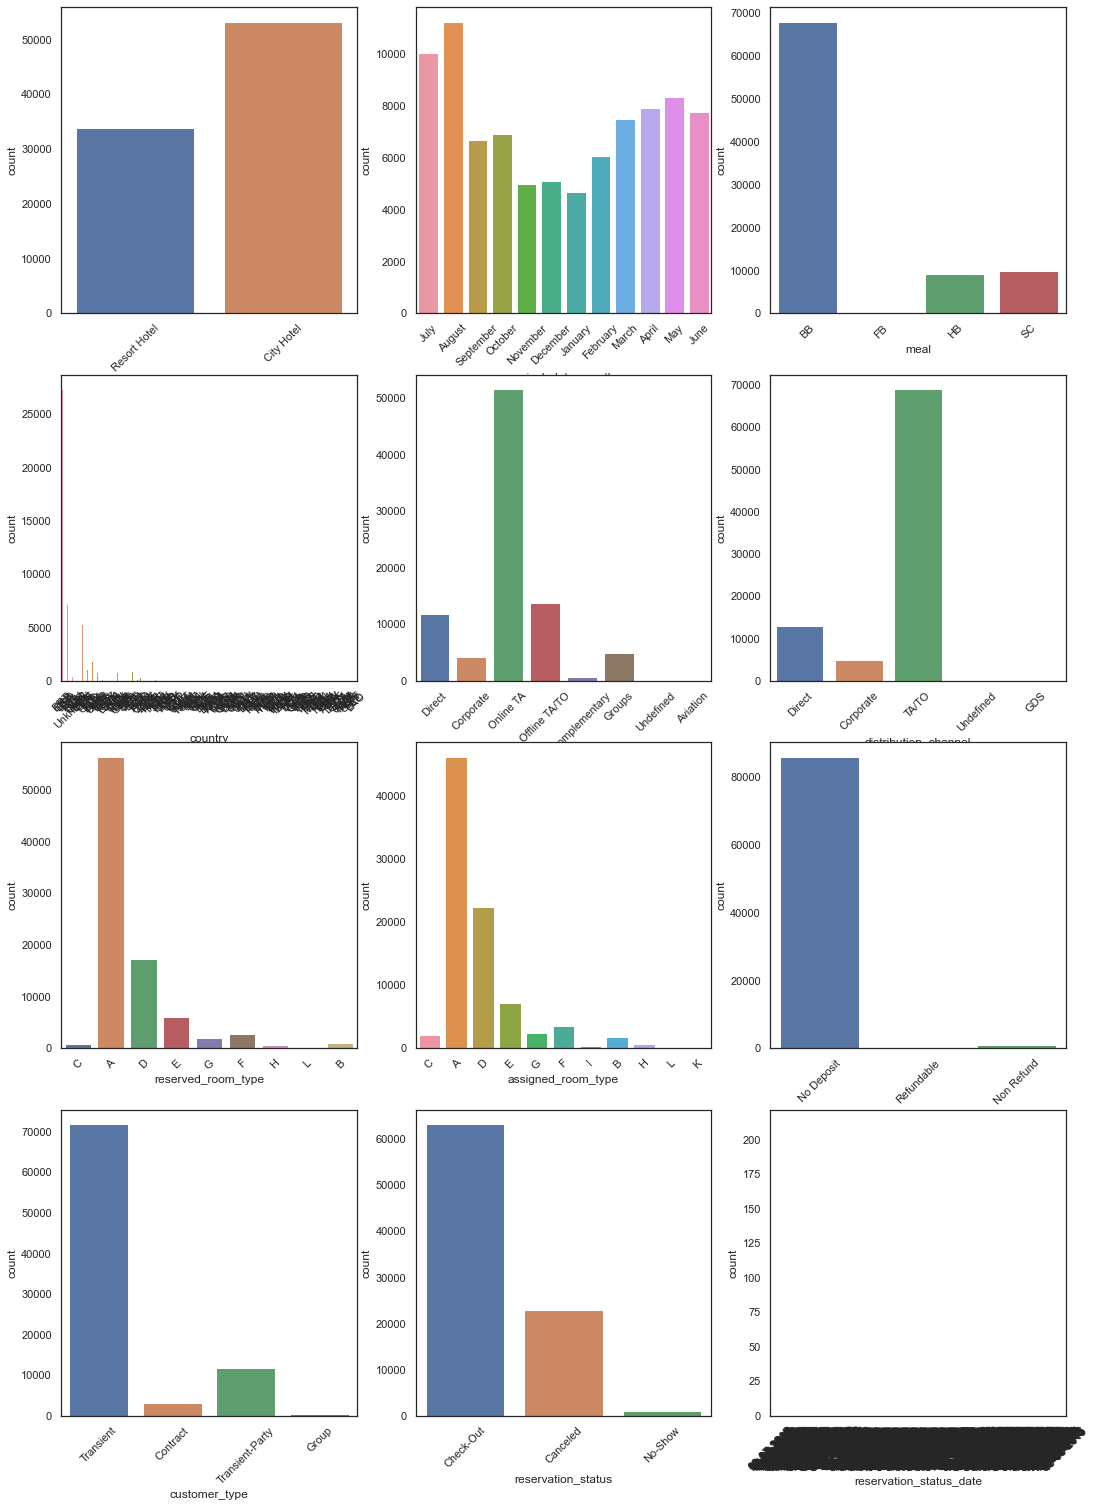

In [41]:
plt.figure(figsize=(18,80),facecolor='white')
plot_num=1
for i in k:
    ax=plt.subplot(12,3,plot_num)
    sns.countplot(x=i,data=hotel_data_clean)
    plt.xticks(rotation=45)
    plot_num+=1
plt.show()

# Analyzing numerical variables.

In [42]:
k1=[]
for i in hotel_data_clean.select_dtypes(exclude='object').columns:
    k1.append(i)

In [43]:
# Plotting distplot to visualize distribution.

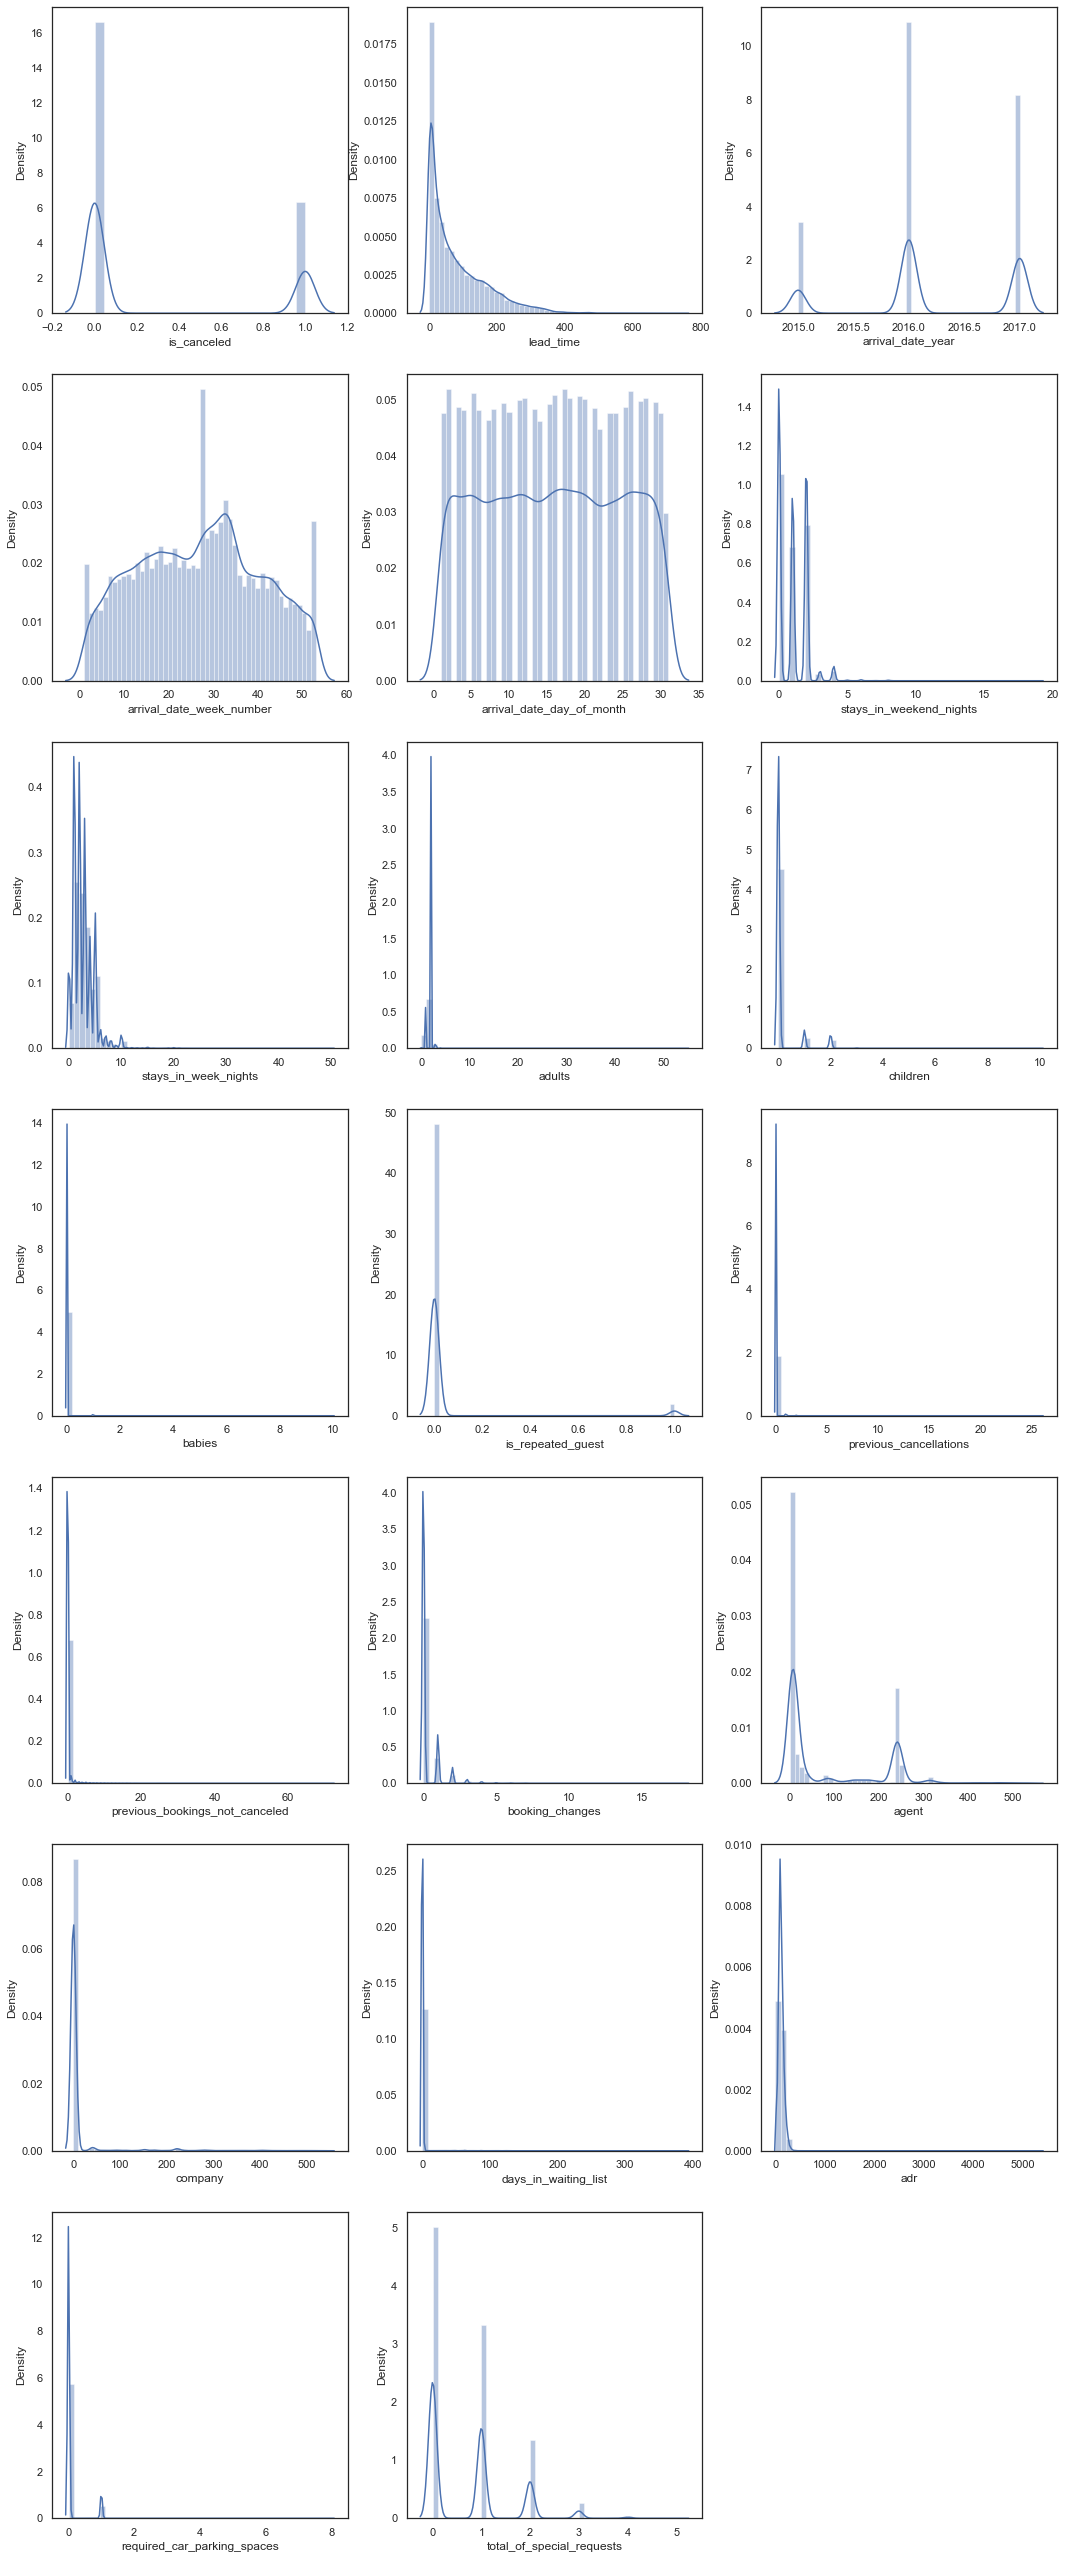

In [44]:
plt.figure(figsize=(18,80),facecolor='white')
plot_num=1
for i in k1:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(hotel_data_clean[i])
    plot_num+=1
plt.show()

# Plotting boxplot to identify outliers.

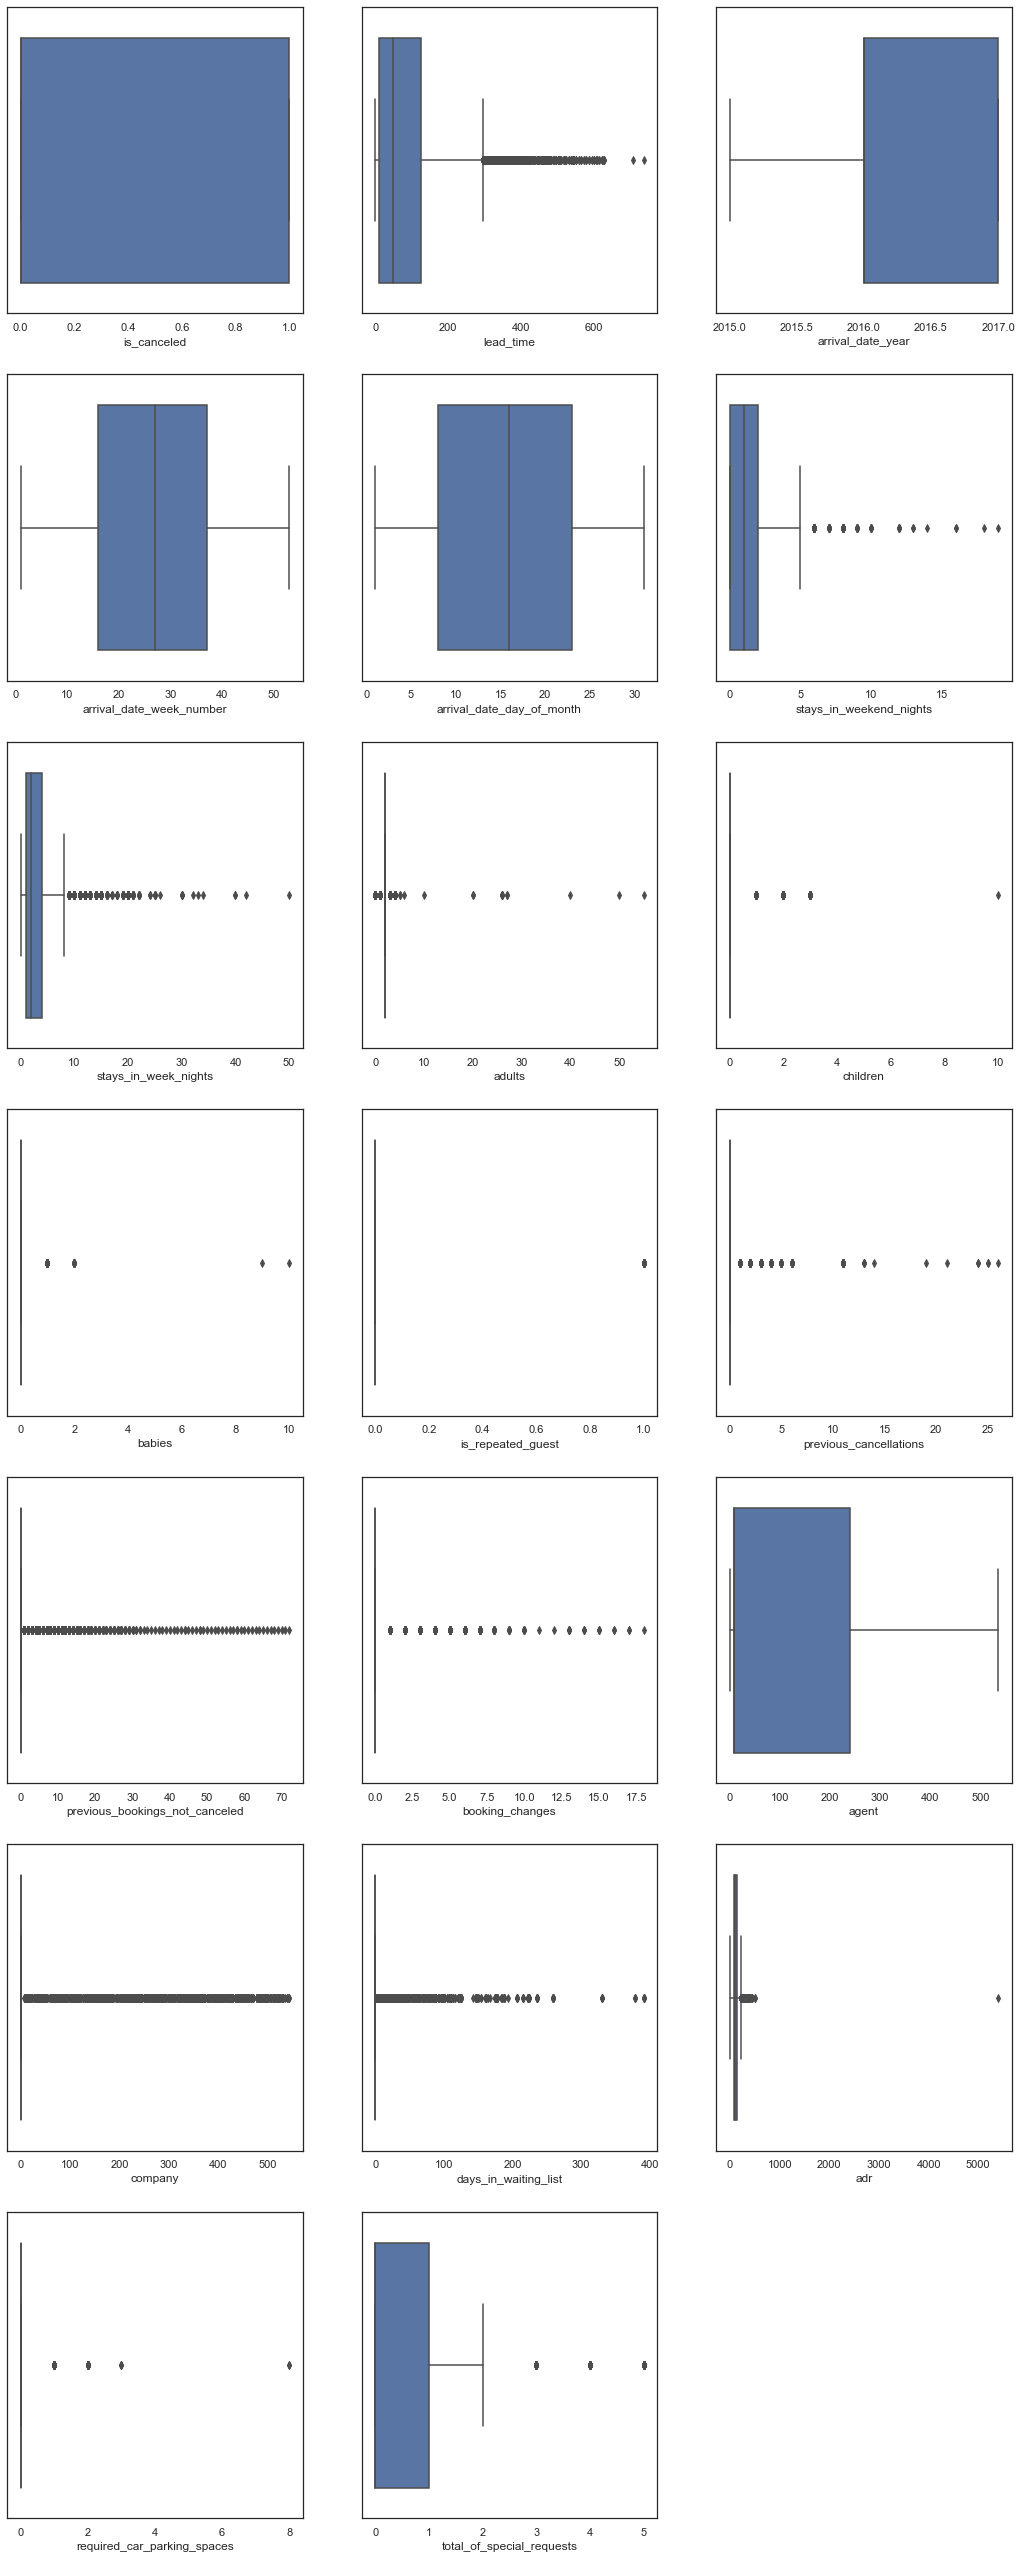

In [45]:
plt.figure(figsize=(18,80),facecolor='white')
plot_num=1
for i in k1:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(hotel_data_clean[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()

# ScatterPlot

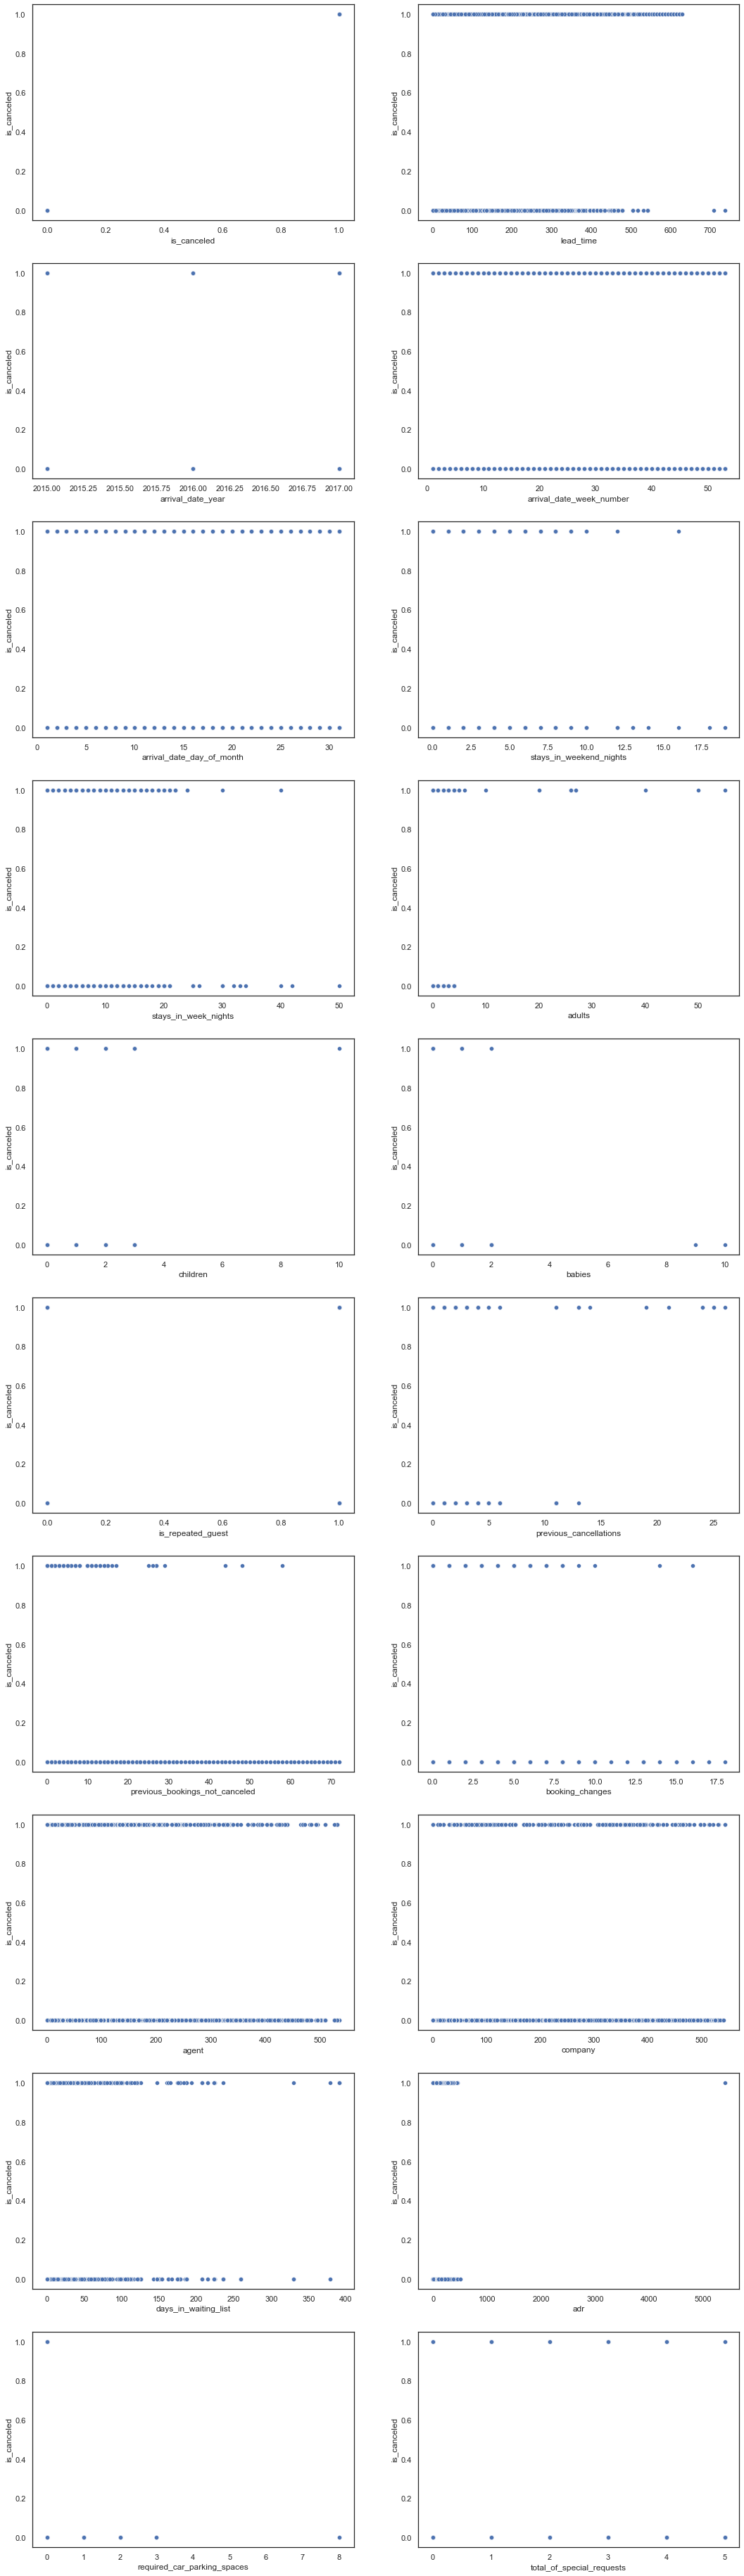

In [46]:
plt.figure(figsize=(18,80),facecolor='white')
plot_num=1
for i in hotel_data_clean.select_dtypes(exclude='object').columns:
    ax=plt.subplot(12,2,plot_num)
    sns.scatterplot(x=i,y='is_canceled',data=hotel_data_clean)
    plot_num+=1
plt.show()

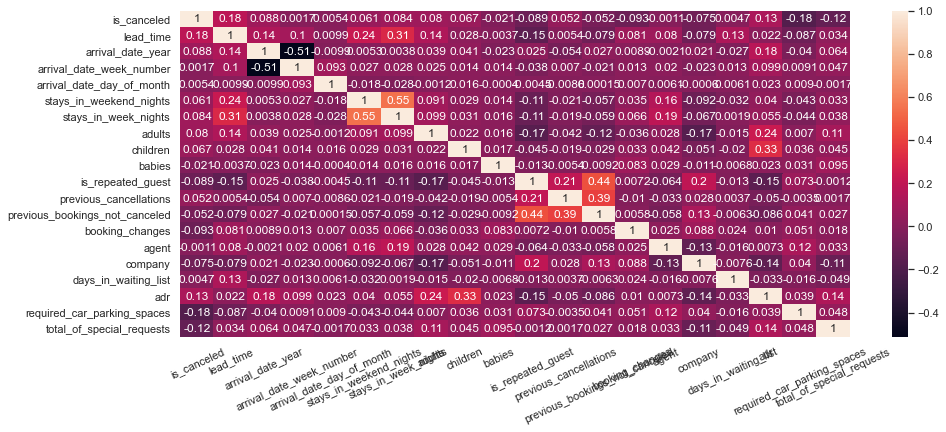

In [47]:
# Plotting heatmap to see the intensity of relation.
plt.figure(figsize=(15,6))
sns.heatmap(hotel_data_clean.corr(),annot=True)
plt.xticks(rotation=25)
plt.show()

# Cancellation by repeated guests

# Let's check how many have cancelled their booking in the respective hotels

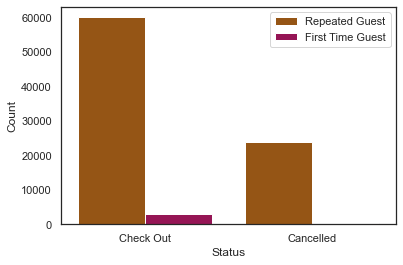

In [48]:
ax = sns.countplot(x="is_canceled", hue="is_repeated_guest", data=hotel_data_clean, palette = 'brg_r')
ax.set(xlabel='Status', ylabel='Count')
positions = (0, 1)
labels = ("Check Out", "Cancelled")
ax.set_xticklabels(labels)
LAB = {'Repeated Guest','First Time Guest'}
ax.legend(labels=LAB)

In [49]:
# #Now we extract those bookings which havent been cancelled and analyze it
# rc = resort[resort['is_canceled'] == 0]
# cc = city[city['is_canceled'] == 0]

# Most Busy Month
# `arrival_date_month` exploration

Text(0, 0.5, 'Number of Bookings')

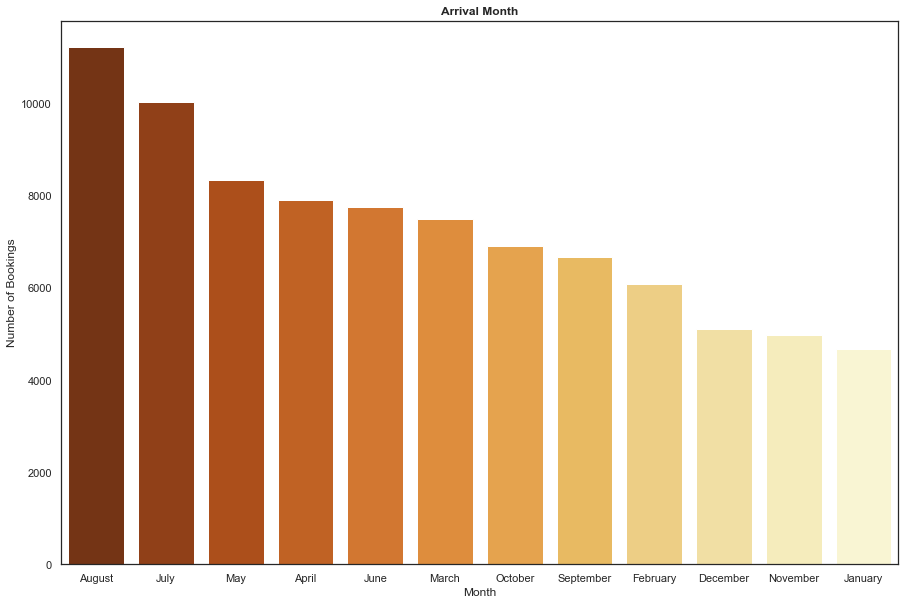

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel_data_clean,
              order=pd.value_counts(hotel_data_clean['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

# Where do the guests come from?

In [89]:
# get number of acutal guests by country
country_data = pd.DataFrame(hotel_data_clean[hotel_data_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [90]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [92]:
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

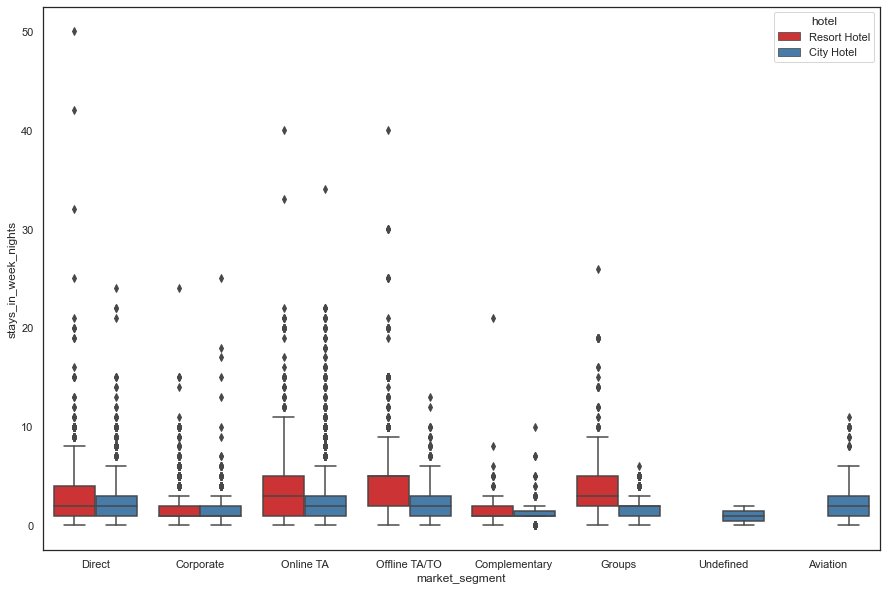

In [54]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');

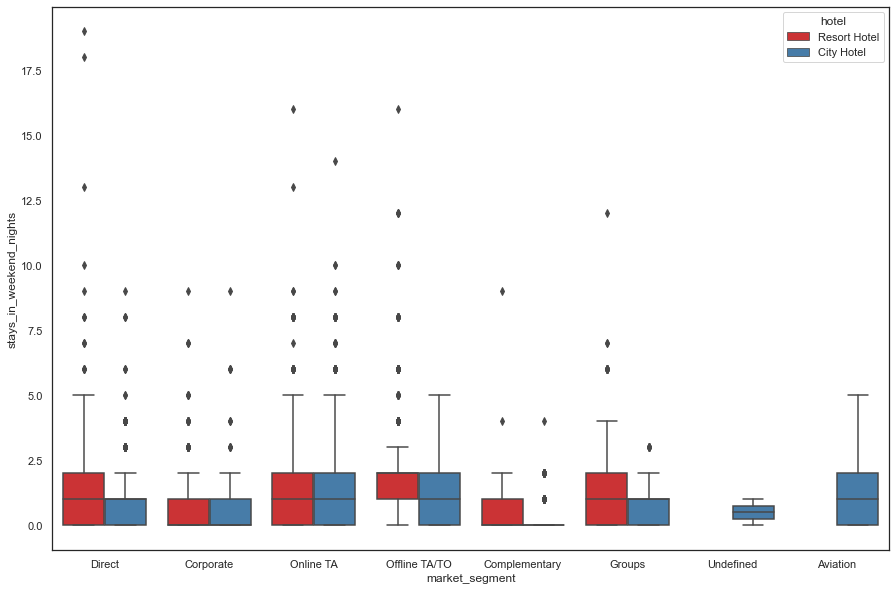

In [55]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');

In [56]:
hotel_data_clean['number_of_nights'] = hotel_data_clean['stays_in_weekend_nights'] + hotel_data_clean['stays_in_week_nights']

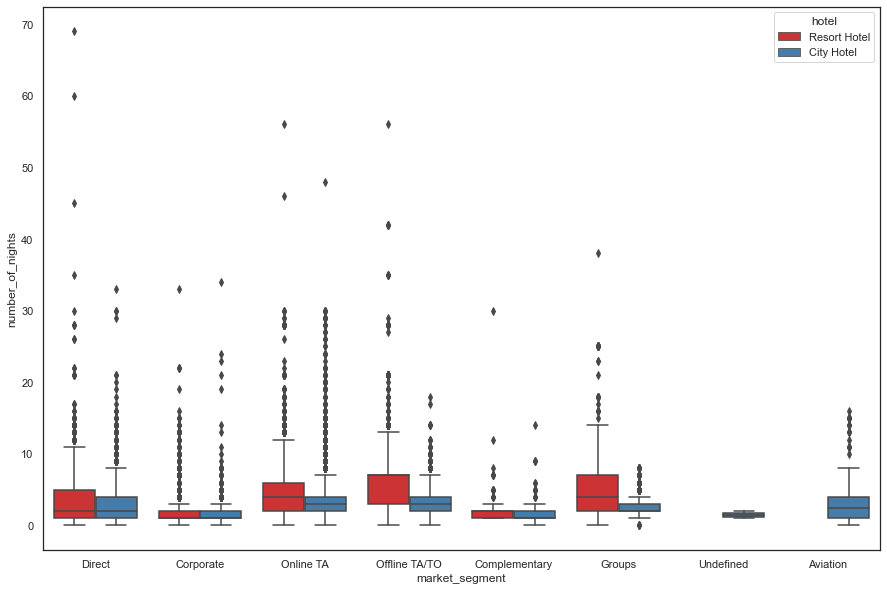

In [57]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "number_of_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');

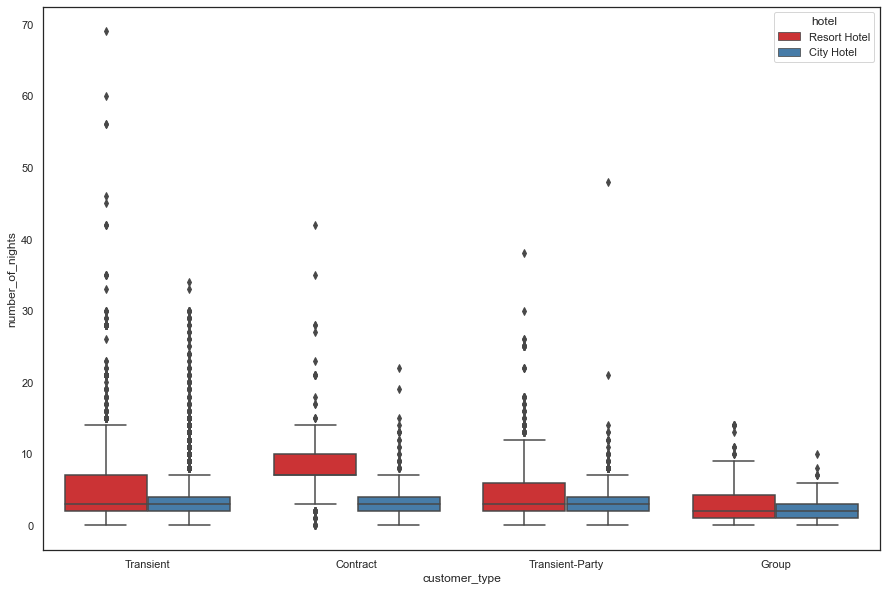

In [58]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "number_of_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');

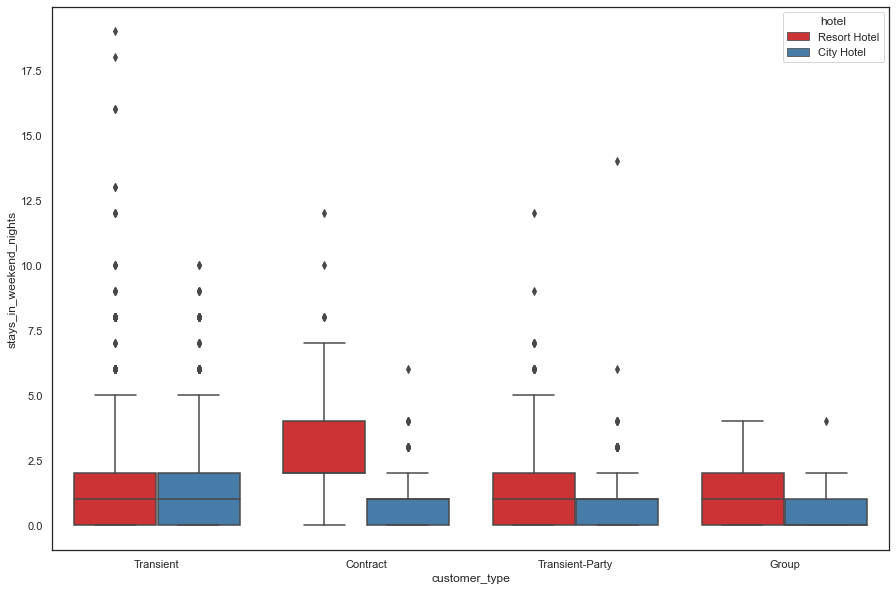

In [59]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');

[Text(0.5, 0, 'Customer Type')]

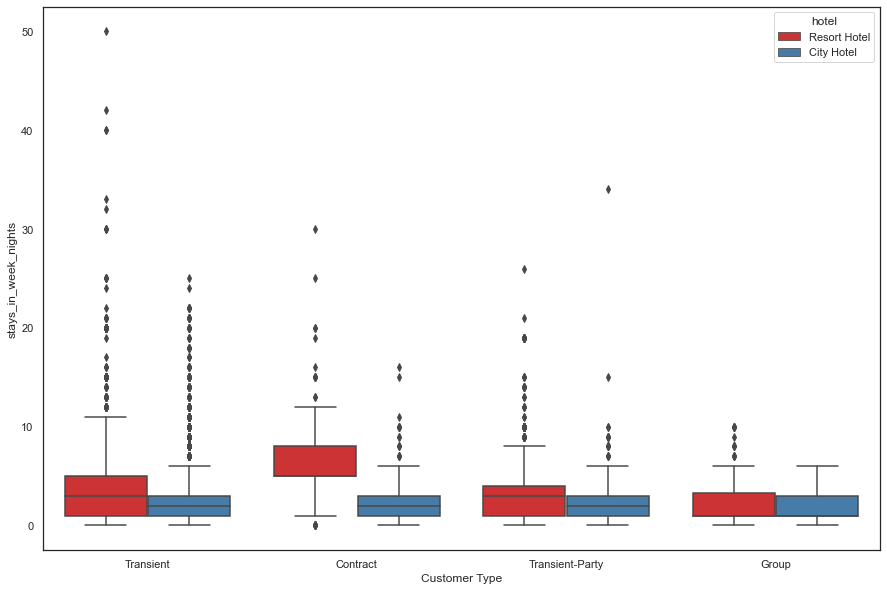

In [60]:
plt.figure(figsize = (15,10))
ab = sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = hotel_data_clean, hue = "hotel", palette = 'Set1');
ab.set(xlabel='Customer Type')

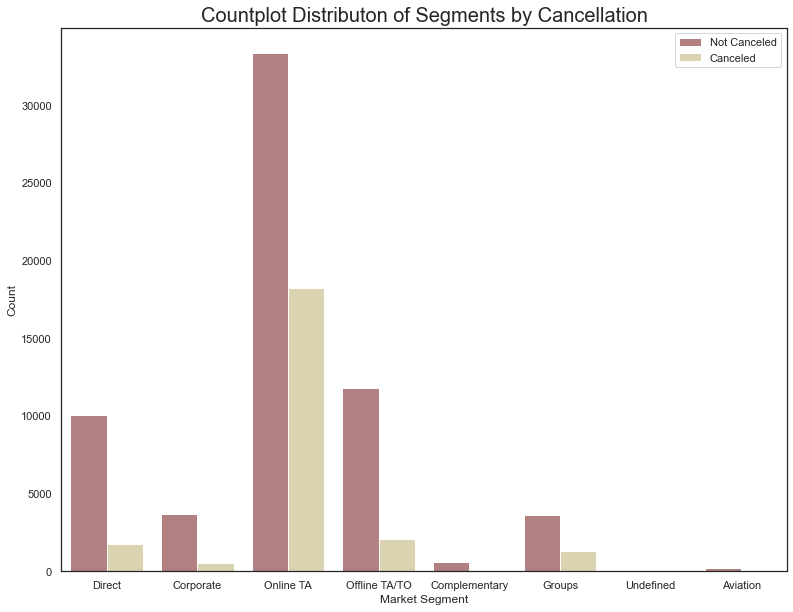

In [61]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=hotel_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
LAB = {'Canceled','Not Canceled'}
ax.legend(labels=LAB)

Text(0.5, 1.0, 'Countplot Distributon of Segments by Cancellation')

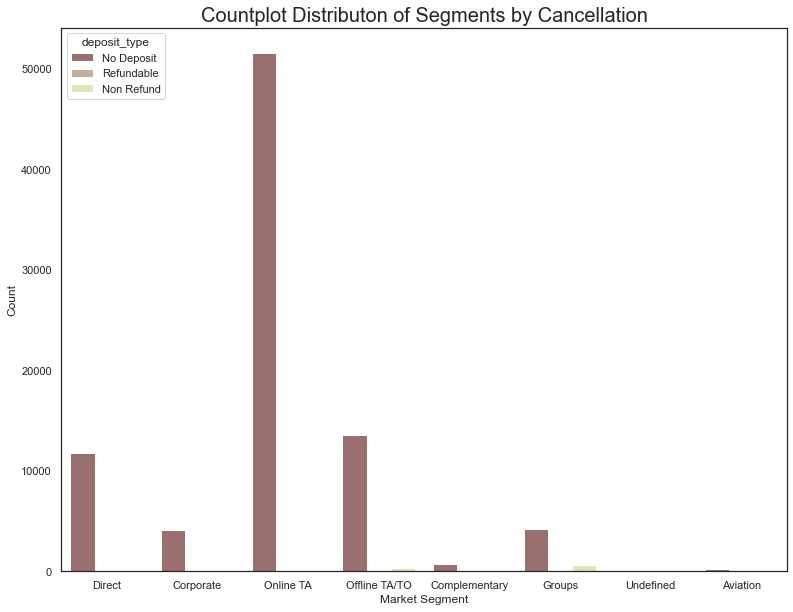

In [62]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="deposit_type", data=hotel_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})

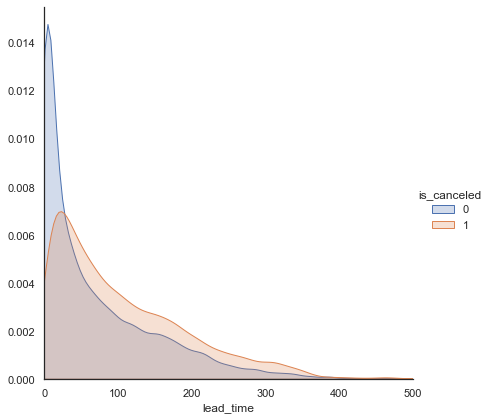

In [63]:
(sns.FacetGrid(hotel_data_clean, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

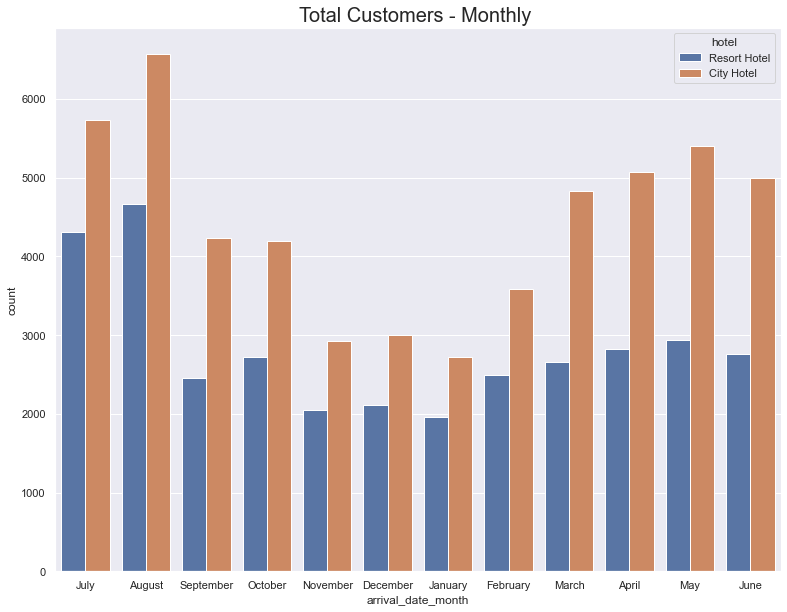

In [64]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = hotel_data_clean)

# How much do guests pay for a room per night?

In [65]:
# rc["adr_pp"] = rc["adr"] / (rc["adults"] + rc["children"])
# cc["adr_pp"] = cc["adr"] / (cc["adults"] + cc["children"])

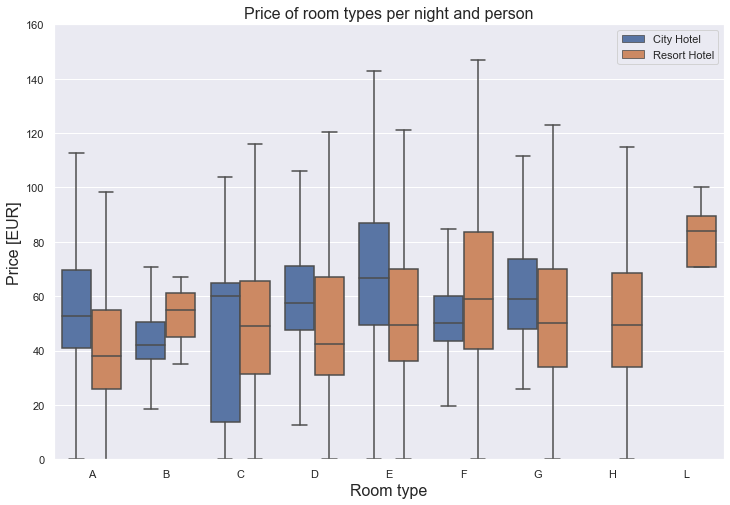

In [66]:
hotel_data_clean["adr_pp"] = hotel_data_clean["adr"] / (hotel_data_clean["adults"] + hotel_data_clean["children"])
full_data_guests = hotel_data_clean[hotel_data_clean["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

# order by month:

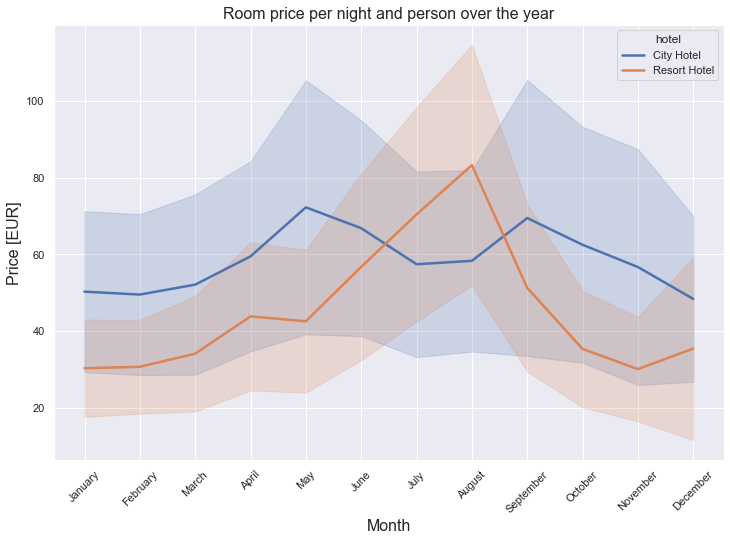

In [67]:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

# Most guests are from Portugal and other countries in Europe.

### What are the Room prices overnights for each month?

In [68]:
data_resort = hotel_data_clean[(hotel_data_clean['hotel'] == 'Resort Hotel') & (hotel_data_clean['is_canceled'] == 0)]
data_city = hotel_data_clean[(hotel_data_clean['hotel'] == 'City Hotel') & (hotel_data_clean['is_canceled'] == 0)]

In [69]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [70]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


Text(0.5, 1.0, 'ADR vs Arrival Month')

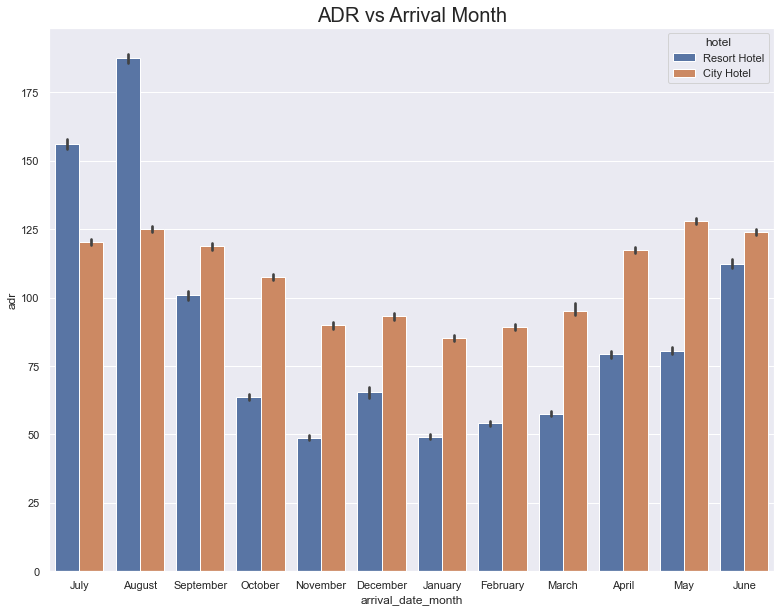

In [71]:
plt.figure(figsize =(13,10))
ax = sns.barplot(x='arrival_date_month', y="adr",hue="hotel",data=hotel_data_clean)
plt.title("ADR vs Arrival Month", fontdict={'fontsize': 20})
#ADR is the average daily rate of the hotel

# Cancelation Vs Lead Time

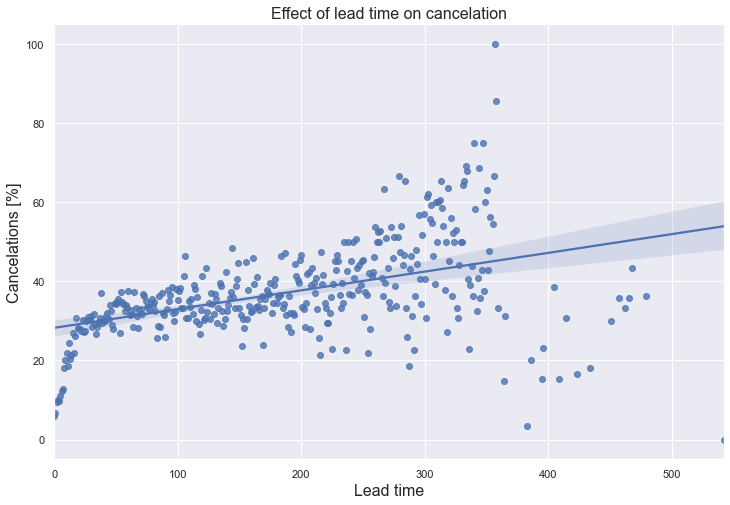

In [72]:
# group data for lead_time:
lead_cancel_data = hotel_data_clean.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

# Feature Engineering and Correlation Matrix

In [73]:
labelencoder = LabelEncoder()
hotel_data_clean['hotel'] = labelencoder.fit_transform(hotel_data_clean['hotel'])
hotel_data_clean['arrival_date_month'] = labelencoder.fit_transform(hotel_data_clean['arrival_date_month'])
hotel_data_clean['meal'] = labelencoder.fit_transform(hotel_data_clean['meal'])
hotel_data_clean['country'] = labelencoder.fit_transform(hotel_data_clean['country'])
hotel_data_clean['market_segment']= labelencoder.fit_transform(hotel_data_clean['market_segment'])
hotel_data_clean['distribution_channel']=labelencoder.fit_transform(hotel_data_clean['distribution_channel'])
hotel_data_clean['is_repeated_guest'] = labelencoder.fit_transform(hotel_data_clean['is_repeated_guest'])
hotel_data_clean['reserved_room_type'] = labelencoder.fit_transform(hotel_data_clean['reserved_room_type'])
hotel_data_clean['assigned_room_type'] = labelencoder.fit_transform(hotel_data_clean['assigned_room_type'])
hotel_data_clean['deposit_type'] = labelencoder.fit_transform(hotel_data_clean['deposit_type'])
hotel_data_clean['agent'] = labelencoder.fit_transform(hotel_data_clean['agent'])
hotel_data_clean['customer_type'] = labelencoder.fit_transform(hotel_data_clean['customer_type'])
hotel_data_clean['reservation_status'] = labelencoder.fit_transform(hotel_data_clean['reservation_status'])
hotel_data_clean['reservation_status_date'] = labelencoder.fit_transform(hotel_data_clean['reservation_status_date'])

In [74]:
hotel_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,number_of_nights,adr_pp
0,1,0,342,2015,5,27,1,0,0,2,...,0.0,0,2,0.0,0,0,1,15,0,0.0
1,1,0,737,2015,5,27,1,0,0,2,...,0.0,0,2,0.0,0,0,1,15,0,0.0
2,1,0,7,2015,5,27,1,0,1,1,...,0.0,0,2,75.0,0,0,1,46,1,75.0
3,1,0,13,2015,5,27,1,0,1,1,...,0.0,0,2,75.0,0,0,1,46,1,75.0
4,1,0,14,2015,5,27,1,0,2,2,...,0.0,0,2,98.0,0,1,1,76,2,49.0


# Create new feature:`all_children` with merge children and baby features

In [75]:
hotel_data_clean['all_children'] = hotel_data_clean['children'] + hotel_data_clean['babies']
pd.crosstab(hotel_data_clean['adults'], hotel_data_clean['all_children'], margins=True, margins_name = 'Total').iloc[:8]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,0,4,201,14,0,0,219
1,16068,274,154,6,1,0,16503
2,56582,4506,3317,90,0,2,64497
3,5404,490,41,0,0,0,5935
4,57,3,0,0,0,0,60
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1


In [76]:
data_categorical = hotel_data_clean[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','all_children']]
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel                 87230 non-null  int32  
 1   is_canceled           87230 non-null  int64  
 2   arrival_date_month    87230 non-null  int32  
 3   meal                  87230 non-null  int32  
 4   country               87230 non-null  int32  
 5   market_segment        87230 non-null  int32  
 6   distribution_channel  87230 non-null  int32  
 7   is_repeated_guest     87230 non-null  int64  
 8   reserved_room_type    87230 non-null  int32  
 9   assigned_room_type    87230 non-null  int32  
 10  deposit_type          87230 non-null  int32  
 11  agent                 87230 non-null  int64  
 12  customer_type         87230 non-null  int32  
 13  reservation_status    87230 non-null  int32  
 14  all_children          87230 non-null  float64
dtypes: float64(1), int

In [77]:
data_numerical= hotel_data_clean.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status','all_children','adr_pp'], axis = 1)
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       87230 non-null  int64  
 1   arrival_date_year               87230 non-null  int64  
 2   arrival_date_week_number        87230 non-null  int64  
 3   arrival_date_day_of_month       87230 non-null  int64  
 4   stays_in_weekend_nights         87230 non-null  int64  
 5   stays_in_week_nights            87230 non-null  int64  
 6   adults                          87230 non-null  int64  
 7   children                        87230 non-null  float64
 8   babies                          87230 non-null  int64  
 9   previous_cancellations          87230 non-null  int64  
 10  previous_bookings_not_canceled  87230 non-null  int64  
 11  booking_changes                 87230 non-null  int64  
 12  company                        

# Spearman Method

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

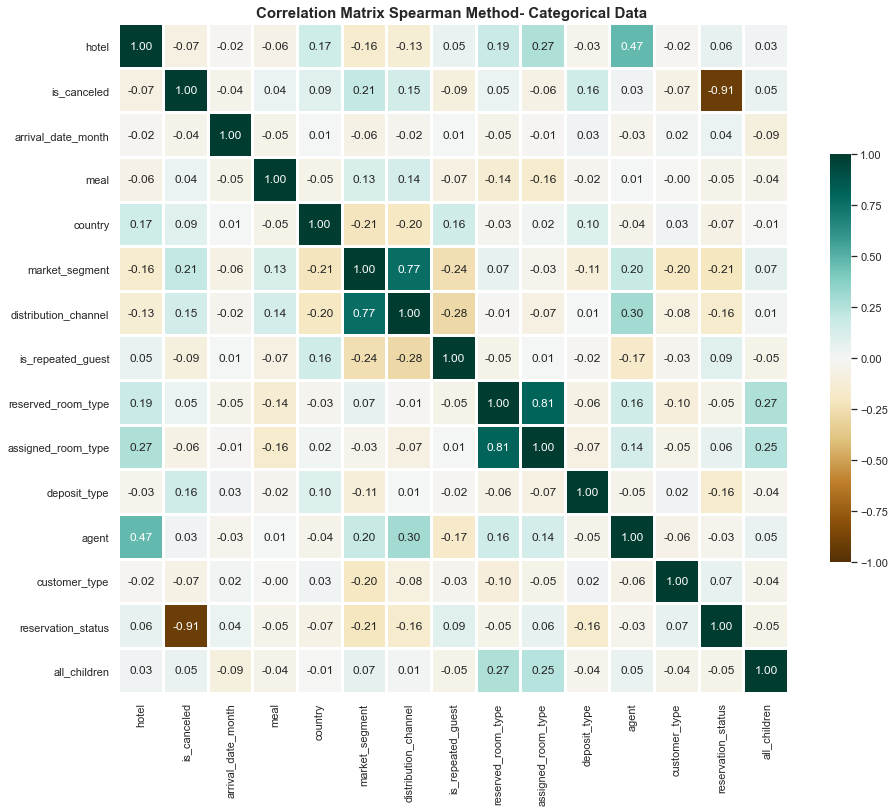

In [78]:
plt.figure(figsize=(15,15))
corr_categorical=data_categorical.corr(method='spearman')
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [79]:
print('customer_type:', hotel_data_clean['customer_type'].unique())
print('reservation_status', hotel_data_clean['reservation_status'].unique())
print('deposit_type', hotel_data_clean['deposit_type'].unique())
print('assigned_room_type', hotel_data_clean['assigned_room_type'].unique())
print('meal', hotel_data_clean['meal'].unique())
print('Country:',hotel_data_clean['country'].unique())
print('Dist_Channel:',hotel_data_clean['distribution_channel'].unique())
print('Market_seg:', hotel_data_clean['market_segment'].unique())
print('reserved_room_type:', hotel_data_clean['reserved_room_type'].unique())

customer_type: [2 0 3 1]
reservation_status [1 0 2]
deposit_type [0 2 1]
assigned_room_type [ 2  0  3  4  6  5  8  1  7 10  9]
meal [0 1 2 3]
Country: [135  59 169  51  76  56 171 139 124 127   6 133  43  15  29  34  66  81
 123  46 140 154  11  52  42  25  54 113  27 100 153   3  75  31 107 103
 166 148 101 134 149  30  12  23  99 162 175   1  80  40 176  37 177  48
  91  38  72   5 161  82  71  69  77  60   4  63 168  83  28  41  35  61
  92 121 106 172 152  55  86 128  73  94 131 144 155  13  20 126 158  47
 108 117   7  85  98  39  33  22 115  36 151 165  19  32  84 156 145  14
 142 174 132 138  50 130 110 116  49 105  79 170 125  21 102 157 163  44
 150  90  53  78  70 141  88 104  18  74 159 122  16 173 164  58  62 160
  64  87  97  65 112 167 118  57 111 129  17  95 109 119  24 136  26   0
   2 147  45 137  68  96   9  67   8 114 120  89 143  10 146  93]
Dist_Channel: [1 0 3 4 2]
Market_seg: [3 2 6 5 1 4 7 0]
reserved_room_type: [2 0 3 4 6 5 7 8 1]


In [80]:
new_data = hotel_data_clean.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

# Predict Cancellation

In [81]:
cancel_corr = hotel_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [82]:
hotel_data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

# Feature Engineering

# Data Preprocessing for Feature Engineering

In [83]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = hotel_data.drop(["is_canceled"], axis=1)[features]
y = hotel_data["is_canceled"]

#Creating Pipeline for the full_data
num_transformer = SimpleImputer(strategy="constant")

#Creating Pipeline for both kinds of data
# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [84]:
# define models to test:
base_models = [("DecisionTree_model", DecisionTreeClassifier(random_state=42)),
               ("RandomForestClassifier_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LogisticRegression_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGBClassifier_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DecisionTree_model cross validation accuarcy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263, 
RandomForestClassifier_model cross validation accuarcy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676, 
LogisticRegression_model cross validation accuarcy score: 0.7935 +/- 0.0012 (std) min: 0.7919, max: 0.7951, 
XGBClassifier_model cross validation accuarcy score: 0.8473 +/- 0.0011 (std) min: 0.8456, max: 0.8487, 


# Enhanced RF model with the best parameters I found:

In [85]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8681 +/- 0.0006 (std) min: 0.8673, max: 0.869


# End